<a href="https://colab.research.google.com/github/Akshay-Rajesh/DSA_Assignments_AkshaY/blob/main/Case_Study_02_Measures_of_Central_Tendency_and_DispersionAssignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("StudentsPerformance.csv")

In [4]:
#First we check if there is any missing data and column names
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [3]:
#As a standard practice let us rename the column names
column_names = data.columns
for i in column_names:
  new_name = i.replace(" " ,"_")
  data.rename(columns = {i:new_name} , inplace = True)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


## **1-Find out how many males and females participated in the test.**

In [11]:
data["gender"].value_counts()

female    518
male      482
Name: gender, dtype: int64

**ANS)- We can see there are 518 females and 482 males .**

## **2- What do you think about the students' parental level of education?**

In [7]:
data1 = data["parental_level_of_education"].value_counts()

data1

some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: parental_level_of_education, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


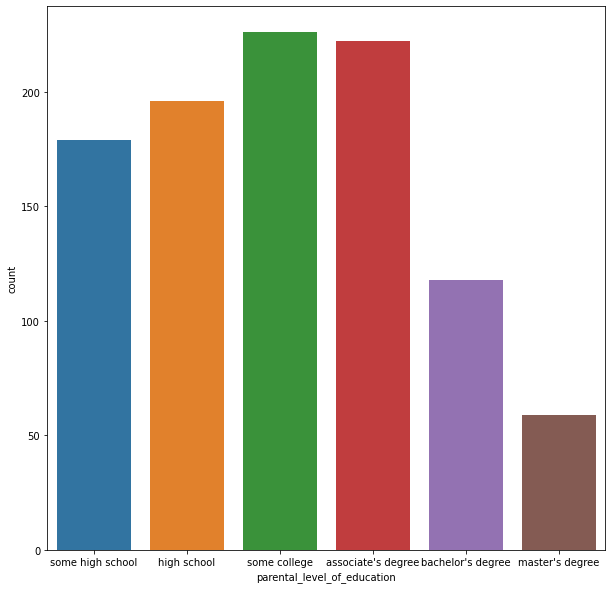

In [18]:
plt.figure(figsize = (10,10))

sns.countplot(data["parental_level_of_education"] )



**We can see that parents whi have a masters or bachelors degree is comparitively low . Most of the parents have only high school education .**

## **3 -Who scores the most on average for math, reading and writing based on**
## **● Gender**
## **● Test preparation course**

In [24]:
groupby_Gender = data.groupby("gender").mean()
groupby_Gender

,math_score,reading_score,writing_score
gender,,,
female,63.376448,72.590734,72.467181
male,68.821577,65.545643,63.446058


**We can see for math score Male average is higher .**
**For reading and writing Female average is higher .**

In [25]:
 groupby_preperation = data.groupby("test_preparation_course").mean()
 groupby_preperation

,math_score,reading_score,writing_score
test_preparation_course,,,
completed,69.96648,74.175978,74.684358
none,63.78972,66.417445,64.457944


**We can clearly see for Math , reading and writing students who did a test preperation course scores better .**

### **4 )-What do you think about the scoring variation for math, reading and writing**
### **based on**
### **● Gender**
### **● Test preparation course**

In [6]:
groupby_gender_std = data.groupby("gender").std()
groupby_gender_std

,math_score,reading_score,writing_score
gender,,,
female,16.029928,14.411018,14.844842
male,14.556411,14.149594,14.227225


 **For males the variation across math , reading , writing is almost same .
For females variation is a bit more for math wheras reading and writing is almost same**

In [7]:
groupby_preperation_std = data.groupby("test_preparation_course").std()
groupby_preperation_std

,math_score,reading_score,writing_score
test_preparation_course,,,
completed,14.521847,13.537572,13.236412
none,15.705689,14.608896,15.041667


**for students who completed a preperation course variation is less compared to students who did not participate in a preperation course**

### **5- The management needs your help to give bonus points to the top 25% of **
### **students based on their maths score, so how will you help the management**
### **to achieve this.**

In [21]:
sorted_data = data.sort_values(by=["math_score"], ascending = False)
total_number = sorted_data["math_score"].count()
percent = int(total_number * (25/100))
sorted_data.head(percent)

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
999,male,group E,bachelor's degree,standard,completed,100,100,100
996,male,group A,some college,standard,completed,100,96,86
515,female,group E,some college,standard,none,100,92,97
517,female,group E,associate's degree,standard,none,100,100,100
516,female,group E,bachelor's degree,standard,none,100,100,100
...,...,...,...,...,...,...,...,...
856,male,group E,some high school,standard,completed,77,76,77
855,male,group E,associate's degree,free/reduced,completed,77,69,68
854,male,group D,some high school,standard,completed,77,68,69
853,male,group D,associate's degree,free/reduced,none,77,78,73


**Above we found out a list of 25% of students as per their math score .**